In [2]:
import numpy as np
from tensorflow.keras import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
(x, y), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x[:48000]
x_val = x[-2000:]

y_train = y[:48000]
y_val = y[-2000:]



Dimensions

In [60]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_val", x_val.shape)
print("y_val", y_val.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (48000, 32, 32, 3)
y_train (48000, 1)
x_val (2000, 32, 32, 3)
y_val (2000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


In [61]:
input = Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3,3), activation='relu')(input)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, (3,3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(128, activation='relu')(x)
x= layers.Dense(10)(x)
output= activations.softmax(x)

model = Model(inputs=input, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_22 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_23 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 14, 14, 64)       0   

In [65]:
donnee_ganerator_train = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=15, width_shift_range=0.15, height_shift_range=0.15, horizontal_flip=True)
donnee_ganerator_train.fit(x_train)

In [66]:
donnee_ganerator_test = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
donnee_ganerator_test.fit(x_val)
donnee_ganerator_test.fit(x_test)

convolutional neural network

In [67]:
model.compile(loss=losses.SparseCategoricalCrossentropy(),optimizer=optimizers.Adam(),metrics=['accuracy'])
history = model.fit(donnee_ganerator_train.flow(x_train, y_train.flatten(), batch_size=64), steps_per_epoch=len(x_train) / 512, epochs=20, validation_data=donnee_ganerator_test.flow(x_val, y_val.flatten(), batch_size=64))

Epoch 1/20
93/93 [==============================] - 9s 89ms/step - loss: 1.9684 - accuracy: 0.3271 - val_loss: 3.3139 - val_accuracy: 0.1740
Epoch 2/20
93/93 [==============================] - 15s 160ms/step - loss: 1.6399 - accuracy: 0.3986 - val_loss: 3.9769 - val_accuracy: 0.2060
Epoch 3/20
93/93 [==============================] - 17s 180ms/step - loss: 1.5396 - accuracy: 0.4438 - val_loss: 2.0805 - val_accuracy: 0.3010
Epoch 4/20
93/93 [==============================] - 16s 172ms/step - loss: 1.4550 - accuracy: 0.4633 - val_loss: 1.3683 - val_accuracy: 0.5055
Epoch 5/20
93/93 [==============================] - 16s 171ms/step - loss: 1.3842 - accuracy: 0.4982 - val_loss: 1.1706 - val_accuracy: 0.5915
Epoch 6/20
93/93 [==============================] - 17s 177ms/step - loss: 1.3211 - accuracy: 0.5196 - val_loss: 1.1771 - val_accuracy: 0.5855
Epoch 7/20
93/93 [==============================] - 17s 177ms/step - loss: 1.2876 - accuracy: 0.5367 - val_loss: 1.2249 - val_accuracy: 0.5820
E

In [68]:
model.evaluate(donnee_ganerator_test.flow(x_test, y_test.flatten(), batch_size=1), verbose=2)

10000/10000 - 29s - loss: 0.9347 - accuracy: 0.6797 - 29s/epoch - 3ms/step


[0.9347360134124756, 0.6797000169754028]

In [70]:
model.save('HW4_cifar10_question_c_model.hdf5')

Plots

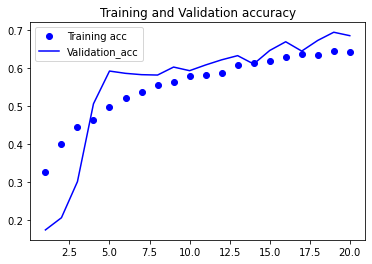

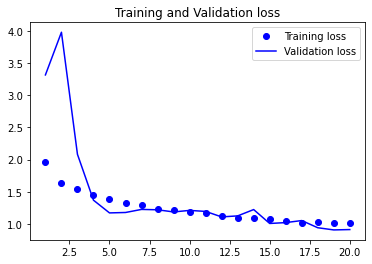

In [71]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

#plot accuracy:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#plot loss:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [72]:
from keras.layers.core import Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import add
from keras.models import Model
from tensorflow import  keras

#inception_block

In [75]:
inputShape = Input(shape = (32,32,3))

layer1 = Conv2D(32,(3,3),padding='same',activation='relu')(inputShape)
layer1 = MaxPooling2D(pool_size=(2,2))(layer1)

layer2 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer2 = MaxPooling2D(pool_size=(2,2))(layer2)

layer3 = Conv2D(64,(3,3),padding='same',activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(2,2))(layer3)

layer4 = Conv2D(64,(3,3),padding='same',activation='relu')(layer3)
layer4 = BatchNormalization()(layer4)

layer4 = MaxPooling2D(pool_size=(2,2))(layer4)

layer4 = Dropout(0.5)(layer4)

block1_1 = Conv2D(64, (1,1), activation='relu', padding='same')(layer4)
block1_1 = Conv2D(64, (3,3), activation='relu', padding='same')(block1_1)
block1_1 = Dropout(0.5)(block1_1)

output = Flatten()(block1_1)
out = Dense(10,activation='softmax')(output)

In [76]:
model = Model(inputs = inputShape,outputs = out)
model.compile(loss=losses.SparseCategoricalCrossentropy(),optimizer=optimizers.Adam(),metrics=['accuracy'])
history = model.fit(donnee_ganerator_train.flow(x_train, y_train.flatten(), batch_size=64), steps_per_epoch=len(x_train) / 512, epochs=20, validation_data=donnee_ganerator_test.flow(x_val, y_val.flatten(), batch_size=64))

Epoch 1/20
93/93 [==============================] - 6s 57ms/step - loss: 2.2116 - accuracy: 0.1850 - val_loss: 2.1951 - val_accuracy: 0.1200
Epoch 2/20
93/93 [==============================] - 5s 55ms/step - loss: 1.9102 - accuracy: 0.2869 - val_loss: 2.1581 - val_accuracy: 0.2090
Epoch 3/20
93/93 [==============================] - 5s 54ms/step - loss: 1.8109 - accuracy: 0.3253 - val_loss: 1.6389 - val_accuracy: 0.4250
Epoch 4/20
93/93 [==============================] - 10s 105ms/step - loss: 1.7194 - accuracy: 0.3536 - val_loss: 1.6231 - val_accuracy: 0.3995
Epoch 5/20
93/93 [==============================] - 9s 99ms/step - loss: 1.6668 - accuracy: 0.3772 - val_loss: 1.4851 - val_accuracy: 0.4545
Epoch 6/20
93/93 [==============================] - 8s 88ms/step - loss: 1.6410 - accuracy: 0.3961 - val_loss: 1.4429 - val_accuracy: 0.4685
Epoch 7/20
93/93 [==============================] - 9s 94ms/step - loss: 1.6087 - accuracy: 0.4097 - val_loss: 1.4218 - val_accuracy: 0.4800
Epoch 8/20


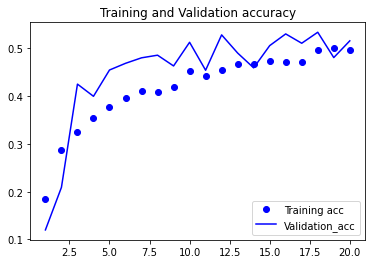

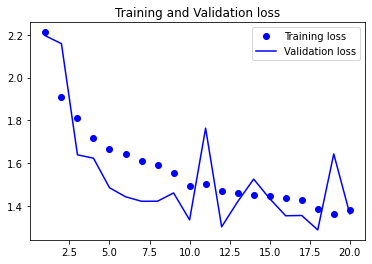

In [77]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

#plot accuracy:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and Validation accuracy')
plt.legend()

#plot loss:
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [78]:
model.save('HW4_cifar10_question_c_model_with_inception_block.hdf5')